<a href="https://colab.research.google.com/github/Rossel/DataQuest_Courses/blob/master/040__Data_Cleaning_Walkthrough_Analyzing_and_Visualizing_the_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE 6/6: DATA CLEANING WALKTHROUGH

# MISSION 3: Data Cleaning Walkthrough: Analyzing and Visualizing the Data


Learn how to analyze and visualize real-world data.

## 1. Introduction

Over the last two missions, we began investigating possible relationships between SAT scores and demographics. In order to do this, we acquired several data sets containing information about [New York City public schools](https://data.cityofnewyork.us/data?cat=education). We cleaned them, then combined them into a single data set named `combined` that we're now ready to analyze and visualize.

In this mission, we'll discover correlations, create plots, and then make maps. The first thing we'll do is find any correlations between any of the columns and `sat_score`. This will help us determine which columns might be interesting to plot out or investigate further. Afterwards, we'll perform more analysis and make maps using the columns we've identified.

## 2. Finding Correlations With the r Value

Correlations tell us how closely related two columns are. We'll be using the [r value](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient), also called Pearson's correlation coefficient, which measures how closely two sequences of numbers are correlated.

An r value falls between `-1` and `1`. The value tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to `1` the r value is, the stronger the positive correlation between the two columns. The closer to `-1` the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are). The closer to `0`, the weaker the correlation. To learn more about r values, see the [statistics course](https://www.dataquest.io/course/probability-statistics-beginner).

The columns in the following diagram have a strong positive correlation -- when the value in `class_size` is high, the corresponding value in `sat_score` is also high, and vice versa:

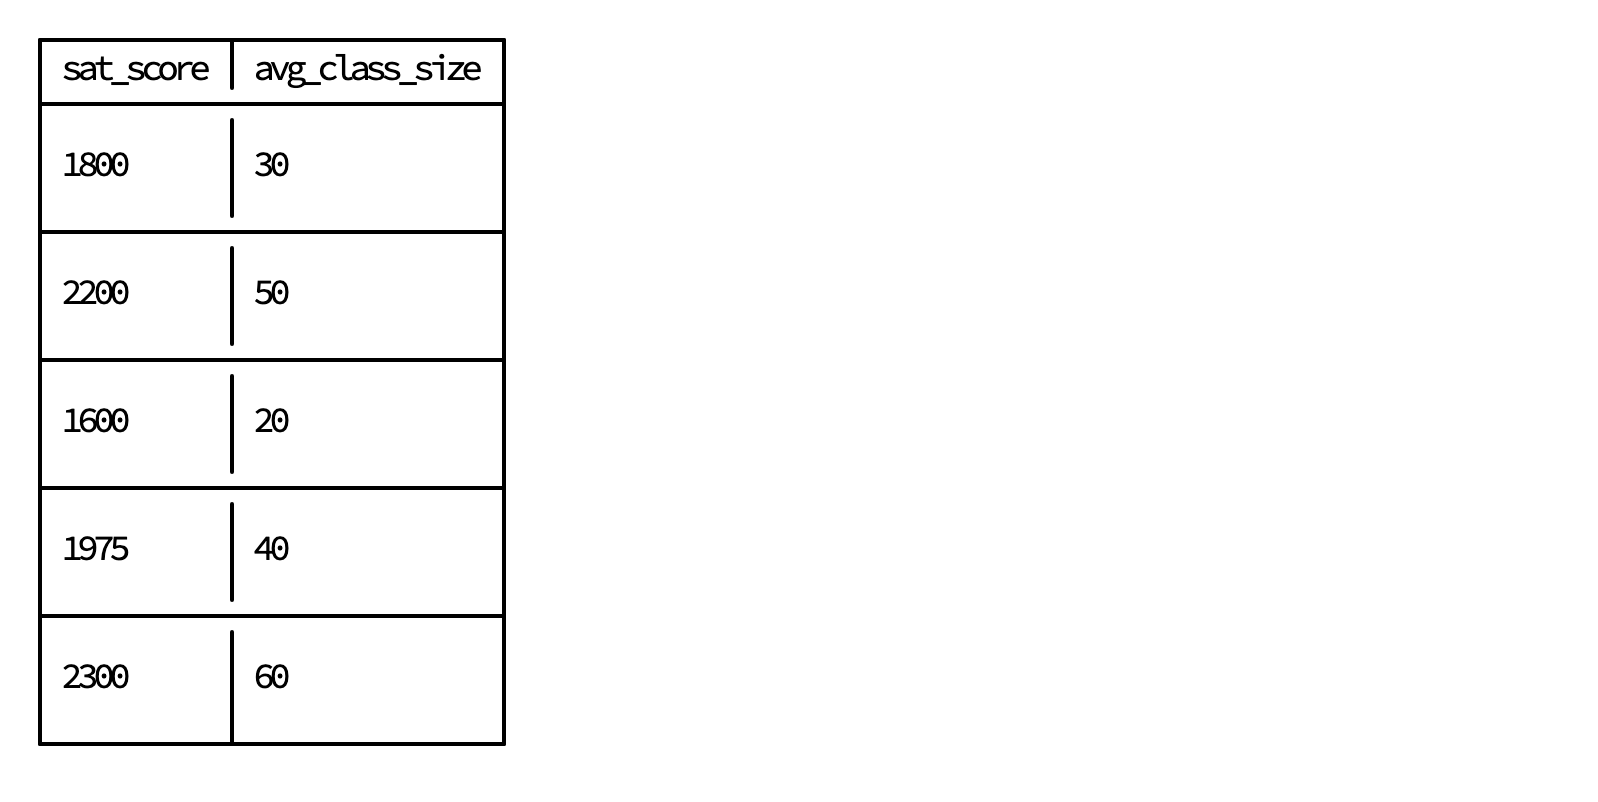

The r value for the columns in the diagram above is `.99`.

The columns in the following diagram have a strong negative correlation -- when the value in `class_size` is high, the corresponding value in `sat_score` is low, and when the value in `sat_score` is high, the value in `class_size` is low:

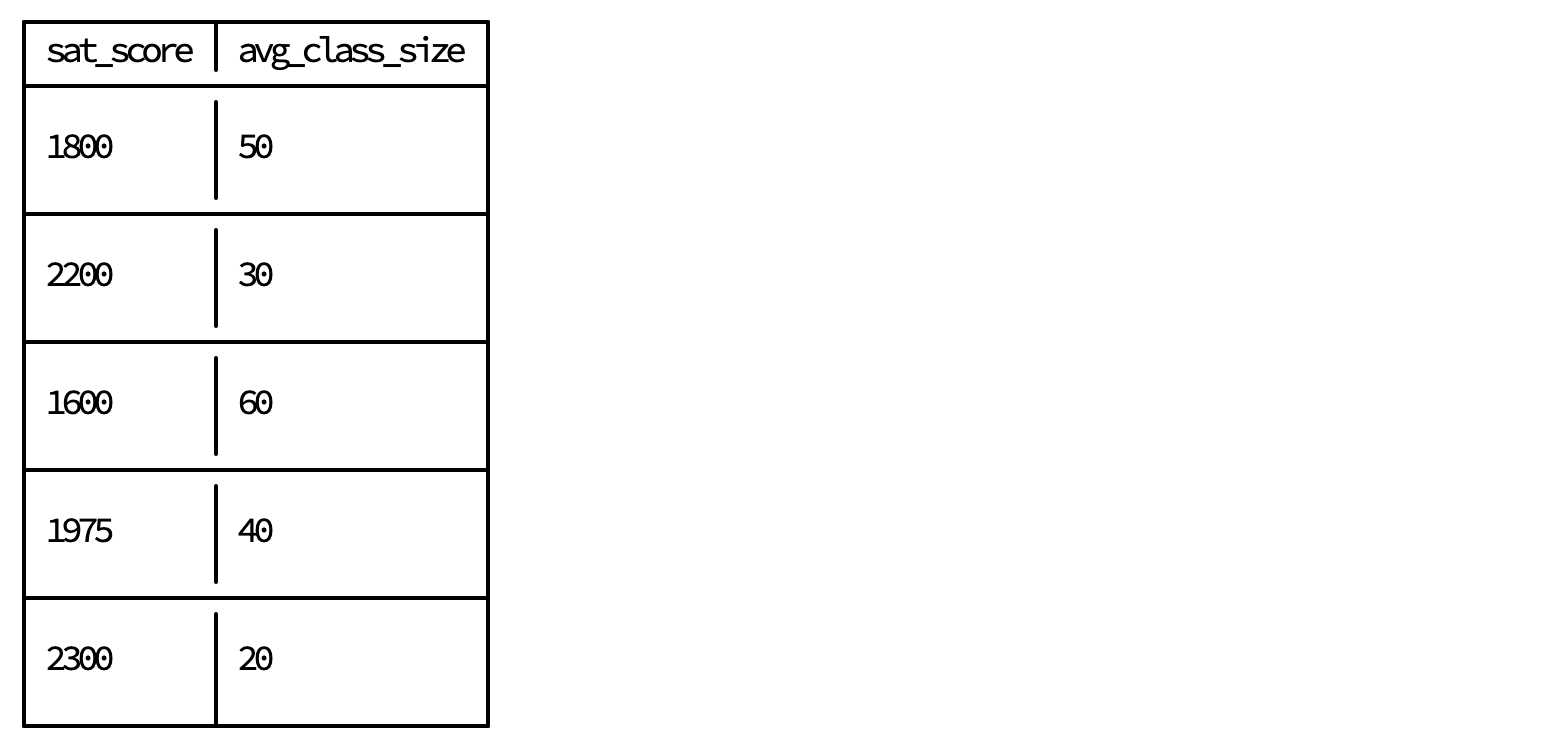

The r value for the columns in the diagram above is `-.99`.

In the next diagram, the columns aren't correlated -- `class_size` and `sat_score` don't have any strong pattern in their values:

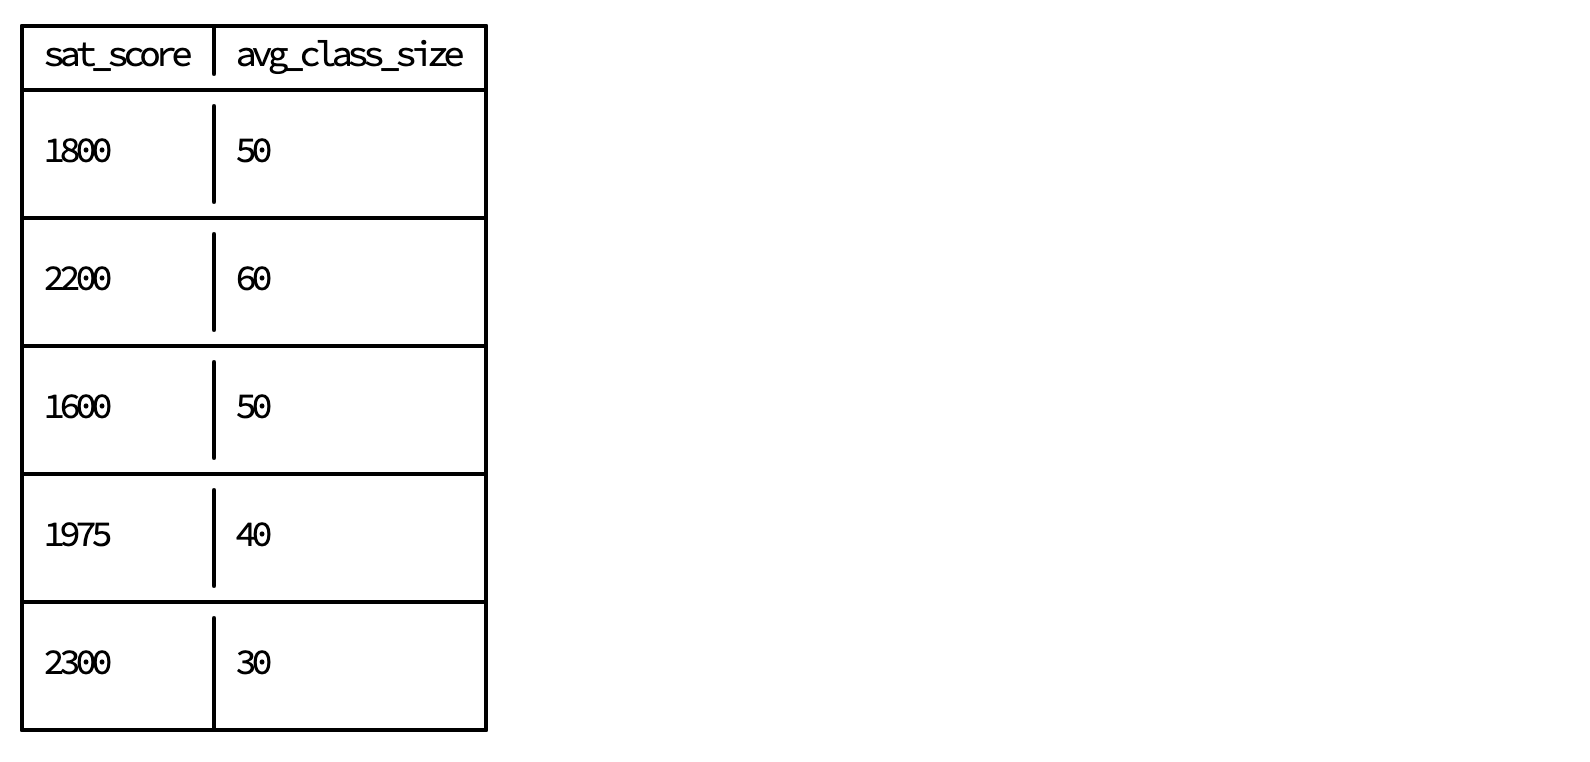

The r value for the columns in the diagram above is `-.02`, which is very close to `0`.

In general, r values above `.25` or below `-.25` are enough to qualify a correlation as interesting. An r value isn't perfect, and doesn't indicate that there's a correlation -- just the possiblity of one. To really assess whether or not a correlation exists, we need to look at the data using a scatterplot to see its "shape." For example, here's a scatterplot with a very strong negative r value of `-.73`:

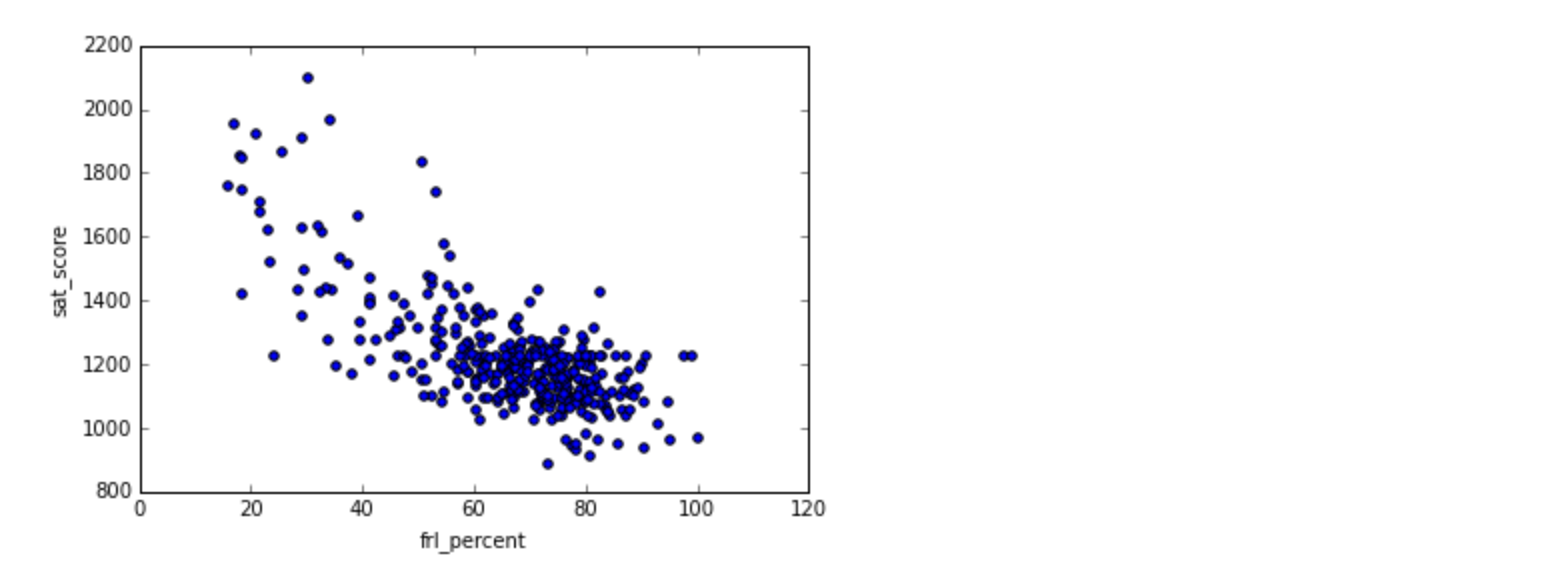

Notice how in the image above, all of the points appear to fall along a line. This pattern indicates a correlation.

Here's a scatterplot with an r value of `.15`, which indicates a weak correlation:

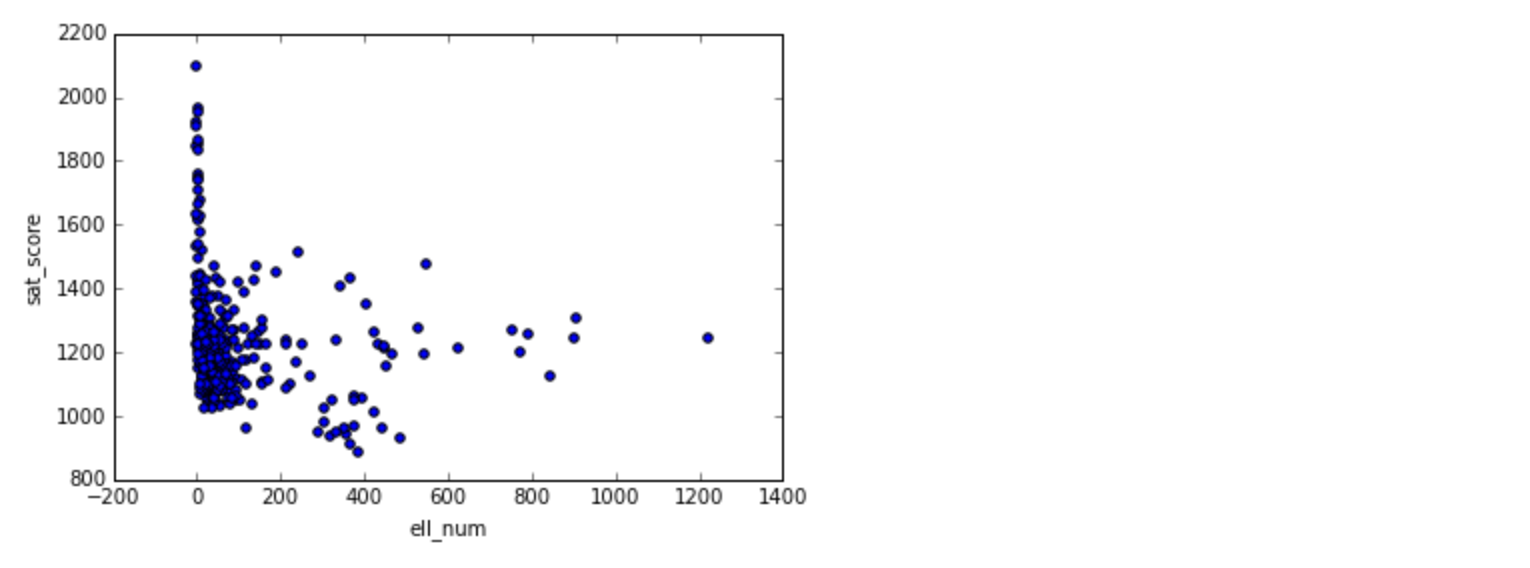

Notice how the data points in the image go in several directions, and there's no clear linear relationship. We'll explore correlations in greater detail later on in the statistics content. For now, this quick primer should be enough to get us through this project.

Because we're interested in exploring the fairness of the SAT, a strong positive or negative correlation between a demographic factor like race or gender and SAT score would be an interesting result meriting investigation. If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women, and vice-versa.

We can use the pandas [pandas.DataFrame.corr()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) method to find correlations between columns in a dataframe. The method returns a new dataframe where the index for each column and row is the name of a column in the original data set.

## 3. Finding Correlations With the r Value

**Instructions:**

- Use the [pandas.DataFrame.corr()]() method on the `combined` dataframe to find all possible correlations. Assign the result to `correlations`.
- Filter `correlations` so that it only shows correlations for the column `sat_score`.
- Display all of the rows in `correlations` and look them over.


In [ ]:
# Import files directly using Google Colab
from google.colab import files
upload = files.upload()
upload = files.upload()

Saving survey_all.txt to survey_all.txt


Saving sat_results.csv to sat_results (1).csv


In [ ]:
data_files = [
    "sat_results.csv"
]
data = {}

for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    key_name = f.replace(".csv", "")
    data[key_name] = d

NameError: ignored

In [ ]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

In [ ]:
# Solution

correlations = combined.corr()
correlations = correlations["sat_results"]
print(correlations)

## 4. Plotting Enrollment With the Plot() Accessor

This is the full output of the correlations variable we generated on the last screen:

```
SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent                            -0.398750
sped_num                                0.034933
sped_percent                           -0.448170
asian_num                               0.475445
asian_per                               0.570730
black_num                               0.027979
black_per                              -0.284139
hispanic_num                            0.025744
hispanic_per                           -0.396985
white_num                               0.449559
                                          ...   
rr_p                                    0.047925
N_s                                     0.423463
N_t                                     0.291463
N_p                                     0.421530
saf_p_11                                0.122913
com_p_11                               -0.115073
eng_p_11                                0.020254
aca_p_11                                0.035155
saf_t_11                                0.313810
com_t_11                                0.082419
eng_t_10                                     NaN
aca_t_11                                0.132348
saf_s_11                                0.337639
com_s_11                                0.187370
eng_s_11                                0.213822
aca_s_11                                0.339435
saf_tot_11                              0.318753
com_tot_11                              0.077310
eng_tot_11                              0.100102
aca_tot_11                              0.190966
grade_span_max                               NaN
expgrade_span_max                            NaN
zip                                    -0.063977
total_students                          0.407827
number_programs                         0.117012
priority08                                   NaN
priority09                                   NaN
priority10                                   NaN
lat                                    -0.121029
lon                                    -0.132222
Name: sat_score, dtype: float64

```

Unsurprisingly, `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, `SAT Writing Avg`. `Score`, and `sat_score` are strongly correlated with `sat_score`.
We can also make some other observations:

- `total_enrollment` has a strong positive correlation with `sat_score`. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.
 
 - Other columns that are proxies for enrollment correlate similarly. These include `total_students`, `N_s`, `N_p`, `N_t`, `AP Test Takers`, `Total Exams Taken`, and `NUMBER OF SECTIONS`.

- Both the percentage of females (`female_per`) and number of females (`female_num`) at a school correlate positively with SAT score, whereas the percentage of males (`male_per`) and the number of males (`male_num`) correlate negatively. This could indicate that women do better on the SAT than men.
- Teacher and student ratings of school safety (`saf_t_11`, and s`af_s_11`) correlate with `sat_score`.
- Student ratings of school academic standards (`aca_s_11`) correlate with `sat_score`, but this does not hold for ratings from teachers and parents (`aca_p_11` and `aca_t_11`).
- There is significant racial inequality in SAT scores (`white_per`, `asian_per`, `black_per`, `hispanic_per`).
- The percentage of English language learners at the school (`ell_percent, `frl_percent`) has a strong negative correlation with SAT scores.

Because enrollment seems to have such a strong correlation, let's make a scatterplot of `total_enrollment` vs `sat_score`. Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.

We can plot columns in a dataframe using the [pandas.DataFrame.plot(](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) accessor on a dataframe. We can also specify a certain plot type. For example, `df.plot.scatter(x="A", y="b")` will create a scatterplot of columns `A` and `B`.

## 5. Plotting Enrollment With the Plot() Accessor

**Instructions:**

- Create a scatterplot of `total_enrollment` versus `sat_score`.

In [ ]:
# Provided code
import matplotlib.pyplot as plt

In [ ]:
# Answer
combined.plot.scatter(x='t otal_enrollment', y='sat_score')
plt.show()

## 6. Exploring Schools With Low SAT Scores and Enrollment

## 7. Plotting Language Learning Percentage

## 8. Calculating District-Level Statistics